# Annotation / Labeling 


## Approach


This approach annotate / label redacted regions. this approach detects color and shape based redaction. that is an improvement. last time I had 2 different approachs (color based and shape based). To demostrate, the screenshots below show an example of redaction using colors (yellow) and blocks (shape).  

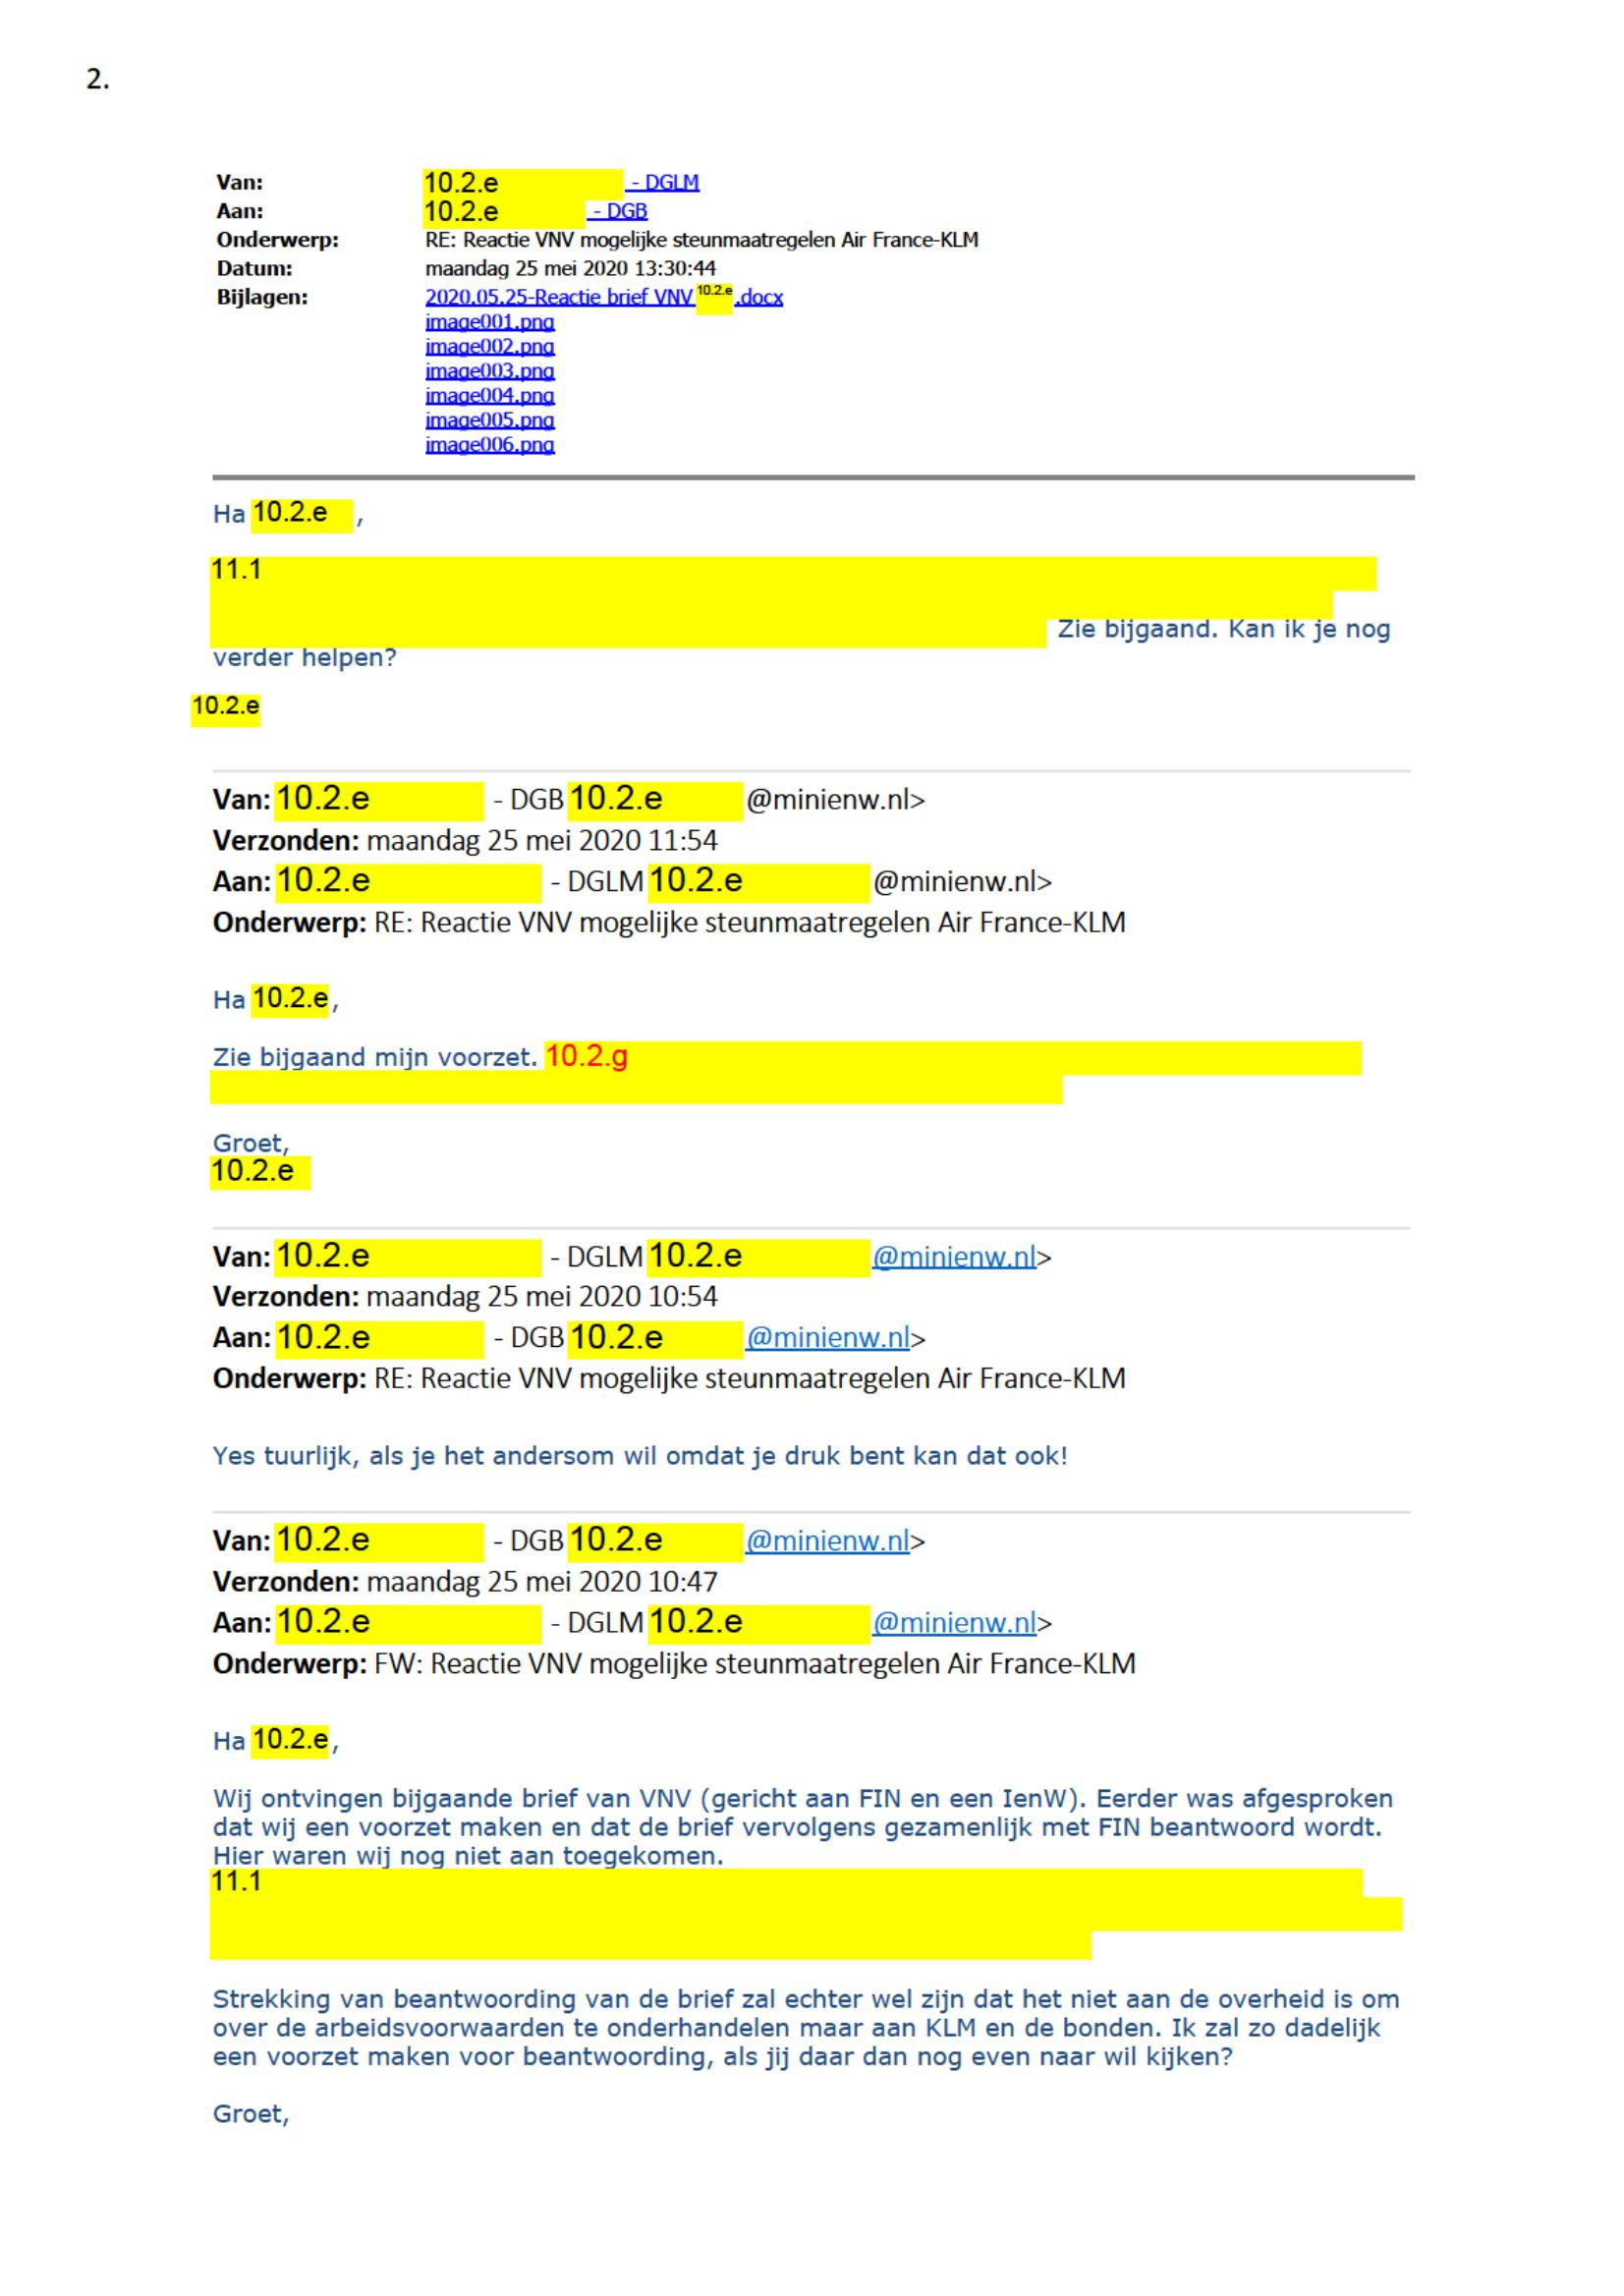

................................................................................................................

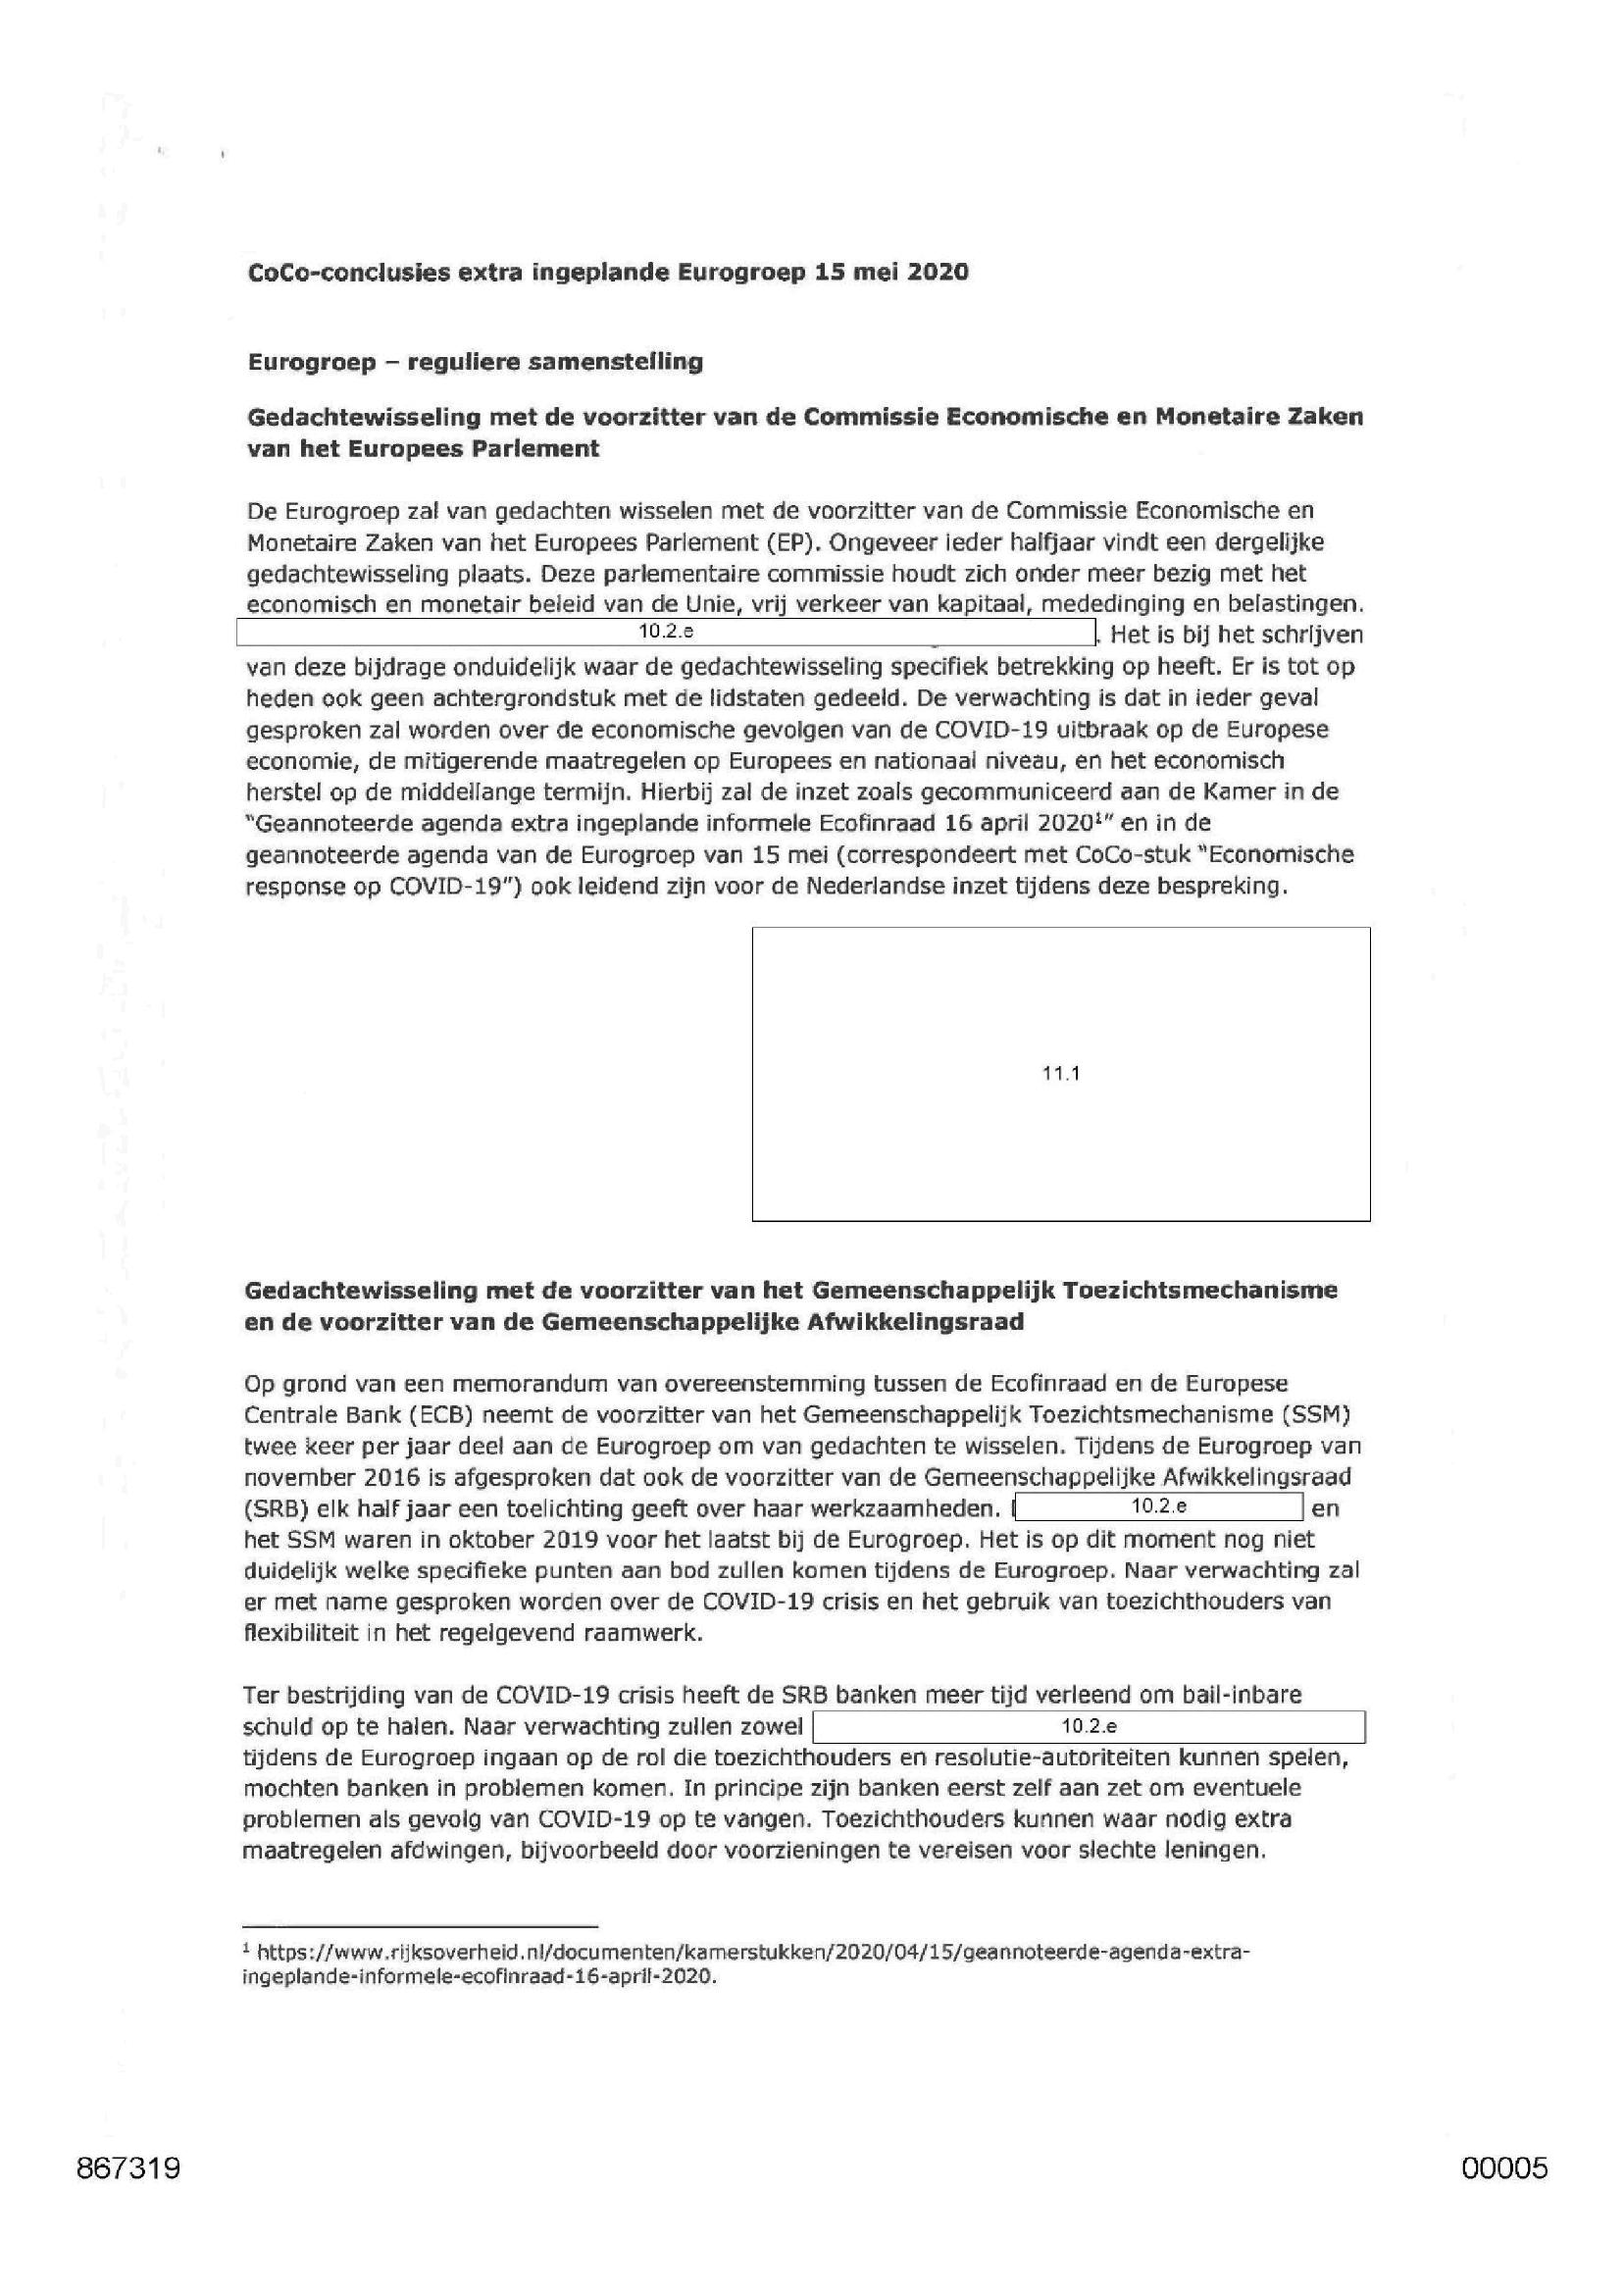

The code below boundbox and label the redacted regions. The improvement from the previous approaches: 1- Determining a more suitable threshold. 2- Calculating the area of the redacted regions and using the are to determine whether or not to label the contours. 

In [ ]:
import cv2 as cv
image = cv.imread("image")
#convert image into greyscale mode
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#find threshold of the image
_, thrash = cv.threshold(gray_image, 226, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thrash, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours:
    area = cv.contourArea(contour)
    shape = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True) 
    x_cor = shape.ravel()[0]
    y_cor = shape.ravel()[1]
    
    if area > 440:
        # len(approx) == 10 or len(approx) == 13
        if len(shape) ==4 or len(shape) ==5 or len(shape) ==6 or len(shape) ==7 or  len(shape) == 8 :

        #shape cordinates
        x,y,w,h = cv.boundingRect(shape)

        #width:height
        aspectRatio = float(w)/h
        cv.drawContours(image, [shape], 0, (0,255,0), 4)
        if aspectRatio >= 0.9 and aspectRatio <=1.1:
            cv.putText(image, "Redaction", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        else:
            cv.putText(image, "Redaction", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0))
        
cv.imshow("Shape", image)
cv.waitKey(0)
cv.destroyAllWindows()

Output below shows that the redacted regions were annotated and labled (as you can see the word "Redaction"). 

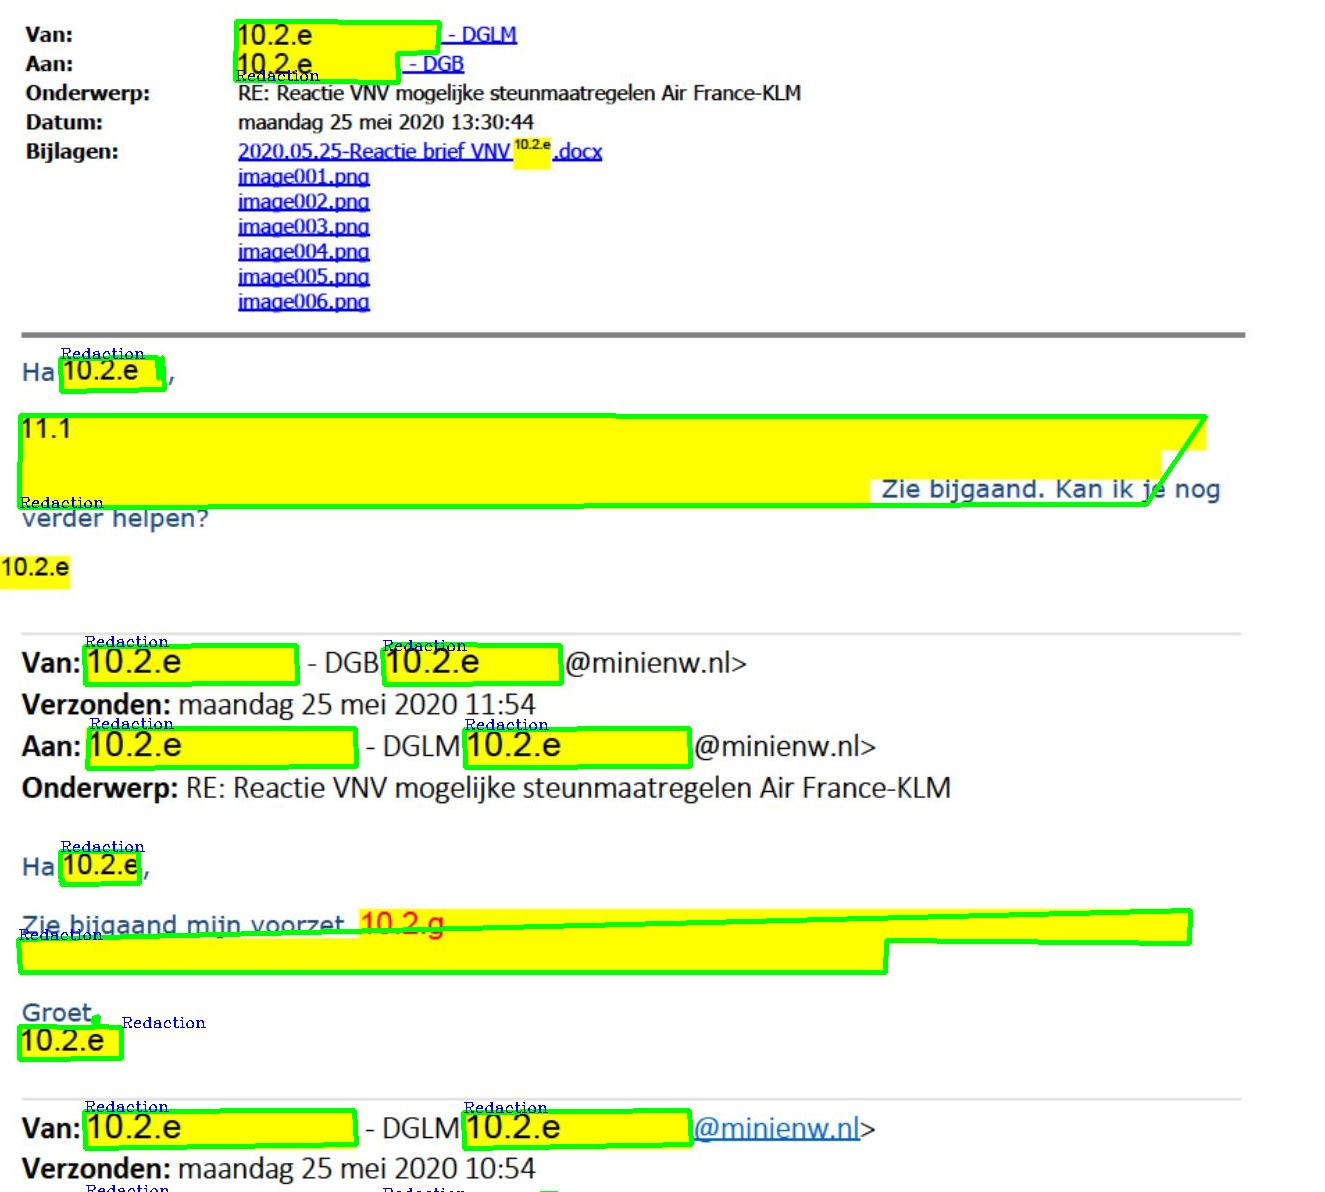

...........................................................................................................

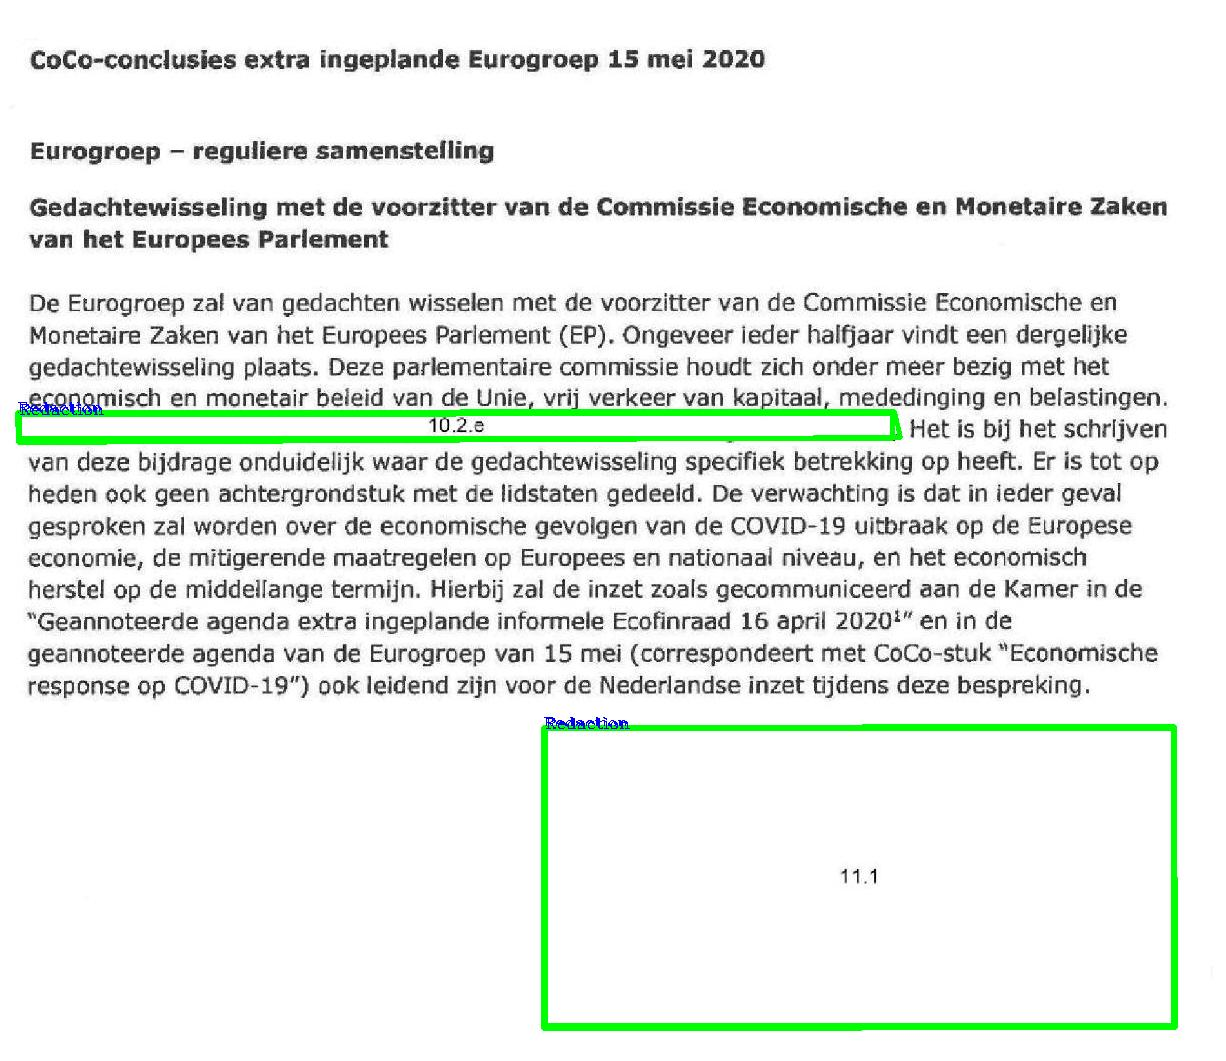

# Next steps

* Use the labeled images as ground truth to train the machine learning & deep-learning models (the one that I was building in the previous update). 
* Write a python script to calculate the accuracy and PQ of the results. 
